In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/clean.csv')
display(df.shape)
df.head()

(1548823, 15)

,id,databaseType,totalMem,timeRead,timeDelete,totalTime,timestamp,serverType,clientTotalTime,requestSize,frequency,instanceType,freeMem,timeWrite,memUsage
0,VWo2CJrUe,sql,2.147484e+09,3.0,81.0,236.0,1.585877e+12,java,425.0,1.0,1.0,b1,1.887261e+09,8.0,0.121176
1,Ge9D-u1oz,sql,2.147484e+09,3.0,91.0,299.0,1.585877e+12,java,489.0,1.0,1.0,b1,1.887121e+09,9.0,0.121241
2,W789KeB31,sql,2.147484e+09,3.0,7.0,154.0,1.585877e+12,java,292.0,1.0,1.0,b1,1.886994e+09,10.0,0.121300
3,YW4UJ3m4N,sql,2.147484e+09,86.0,8.0,255.0,1.585877e+12,java,448.0,1.0,1.0,b1,1.886646e+09,10.0,0.121462
4,RRAbhpXkJ,sql,2.147484e+09,4.0,6.0,152.0,1.585877e+12,java,288.0,1.0,1.0,b1,1.886482e+09,9.0,0.121538


In [23]:
servers = sorted(['java', 'nodejs'])
databases = sorted(['nosql', 'sql'])
instances = sorted(['b1', 'b2', 'b4', 'b8'])

combinations = [(servers[0], databases[0]), (servers[1], databases[0]), (servers[0], databases[1]), (servers[1], databases[1])]

sizes = sorted(list(df['requestSize'].unique()))
frequencies = sorted(list(df['frequency'].unique()))

In [53]:
def plot_request_sizes(metric):
    colors = plt.cm.get_cmap('tab20', 16)(np.linspace(0, 1, 16))
    linestyles = ['-', '--', '-.', ':']
    fig, ax = plt.subplots(2, 2)
    i = 0
    idx = -1
    for instance in instances:
        idx += 1
        for combination in combinations:
            row = math.floor(idx / 2)
            col = idx%2
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))
            
            x_vals = []
            y_vals = []
            
            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]
                
                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())
                    
            ax[row][col].plot(x_vals, 
                    y_vals, 
                    color=colors[i], 
                    linewidth=3.0,
                    linestyle=linestyles[i%4],
                    label='{} - {} {}'.format(instance, combination[0], combination[1])
                   )
            i+=1
            
            ax[row][col].set_ylim(0)
            ax[row][col].set_xticks(sizes)
            ax[row][col].set_title('{} Payload Size analysis - {}'.format(instance, metric))
            ax[row][col].set_xlabel('Payload Sizes (KB)')
            ax[row][col].set_ylabel('Memory Utilization (%)')
            ax[row][col].set_ylim([0,0.4])
            ax[row][col].legend(handlelength=3, prop={'size': 10})
            ax[row][col].grid(True)
    fig.set_size_inches(22, 12)
    plt.savefig('graphs/times/size-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

In [54]:
def plot_frequencies(metric):
    colors = plt.cm.get_cmap('tab20', 16)(np.linspace(0, 1, 16))
    linestyles = ['-', '--', '-.', ':']
    fig, ax = plt.subplots(2, 2)
    i = 0
    idx = -1
    for instance in instances:
        idx += 1
        for combination in combinations:
            row = math.floor(idx / 2)
            col = idx%2
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
                    
                    
            ax[row][col].plot(x_vals, 
                    y_vals, 
                    color=colors[i], 
                    linewidth=3.0,
                    linestyle=linestyles[i%4],
                    label='{} - {} {}'.format(instance, combination[0], combination[1])
                   )
            i+=1
            
            ax[row][col].set_ylim(0)
            ax[row][col].set_xticks(sizes)
            ax[row][col].set_title('{} Frequency analysis - {}'.format(instance, metric))
            ax[row][col].set_xlabel('Frequencies (Hz)')
            ax[row][col].set_ylabel('Memory Utilization (%)')
            ax[row][col].set_ylim([0,0.4])
            ax[row][col].set_xlim([0,70])
            ax[row][col].legend(handlelength=3, prop={'size': 10})
            ax[row][col].grid(True)
    fig.set_size_inches(22, 12)
    plt.savefig('graphs/times/frequency-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

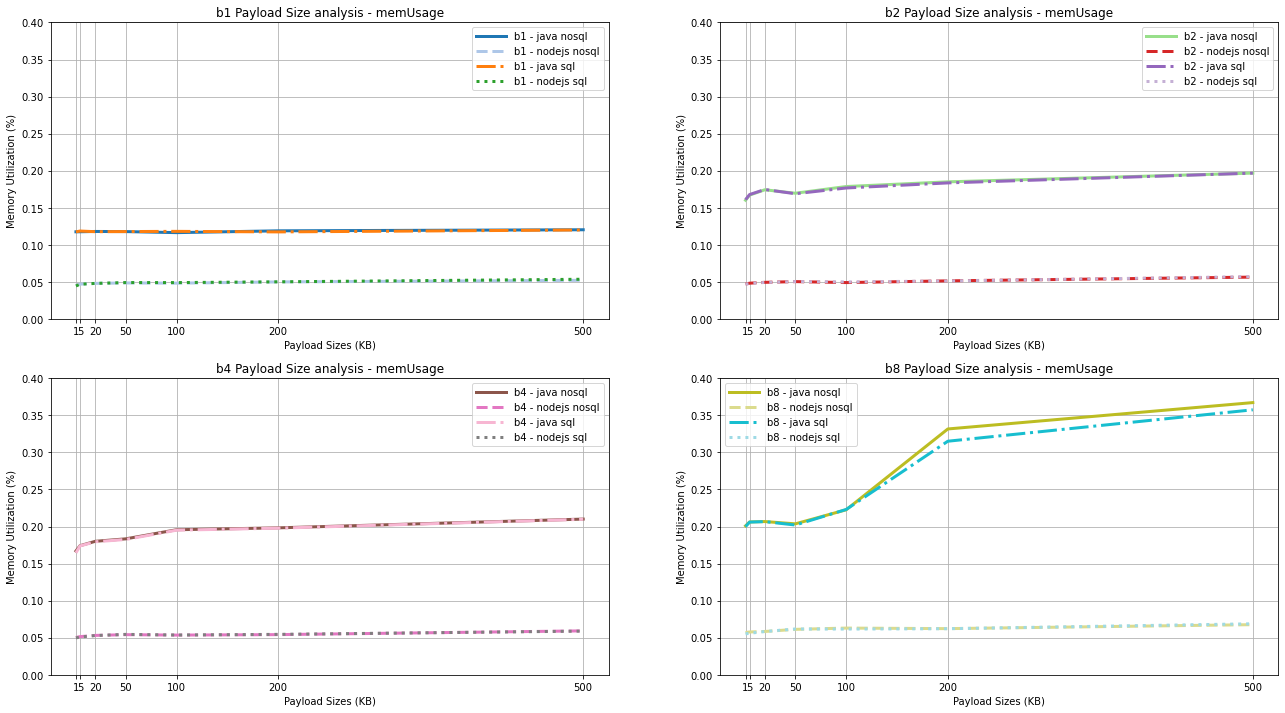

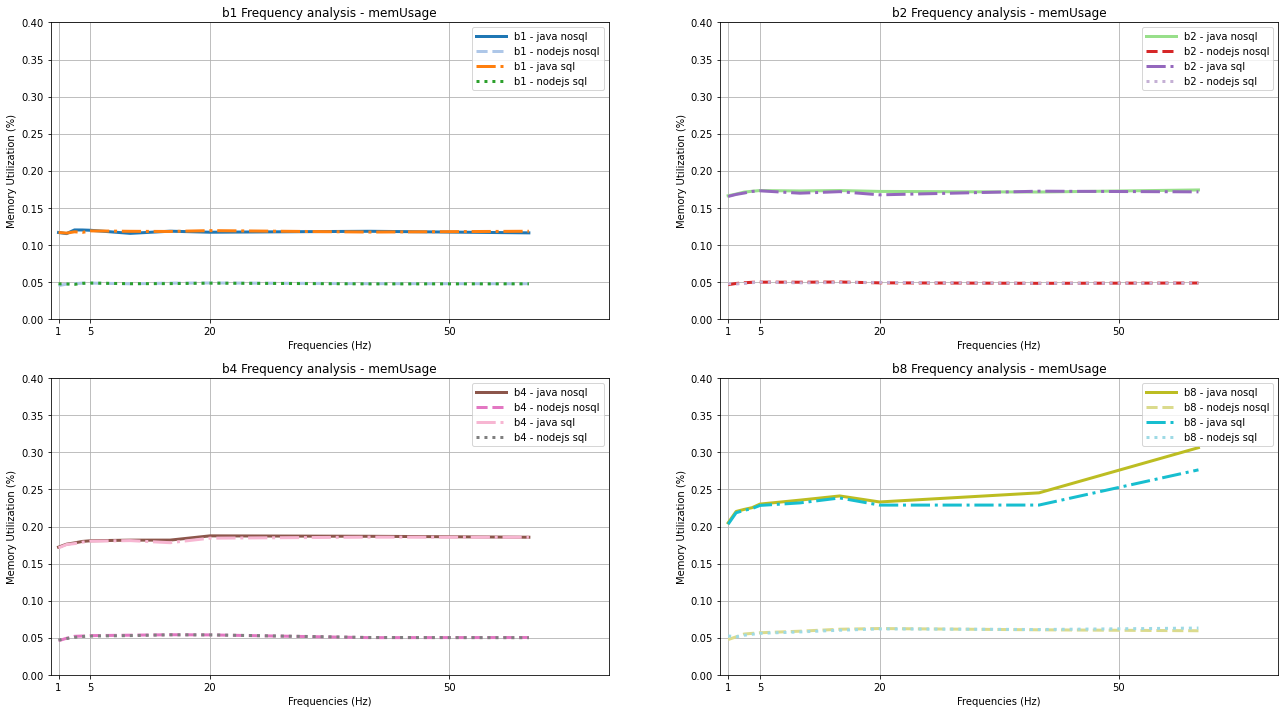

In [55]:
plot_request_sizes('memUsage')
plot_frequencies('memUsage')

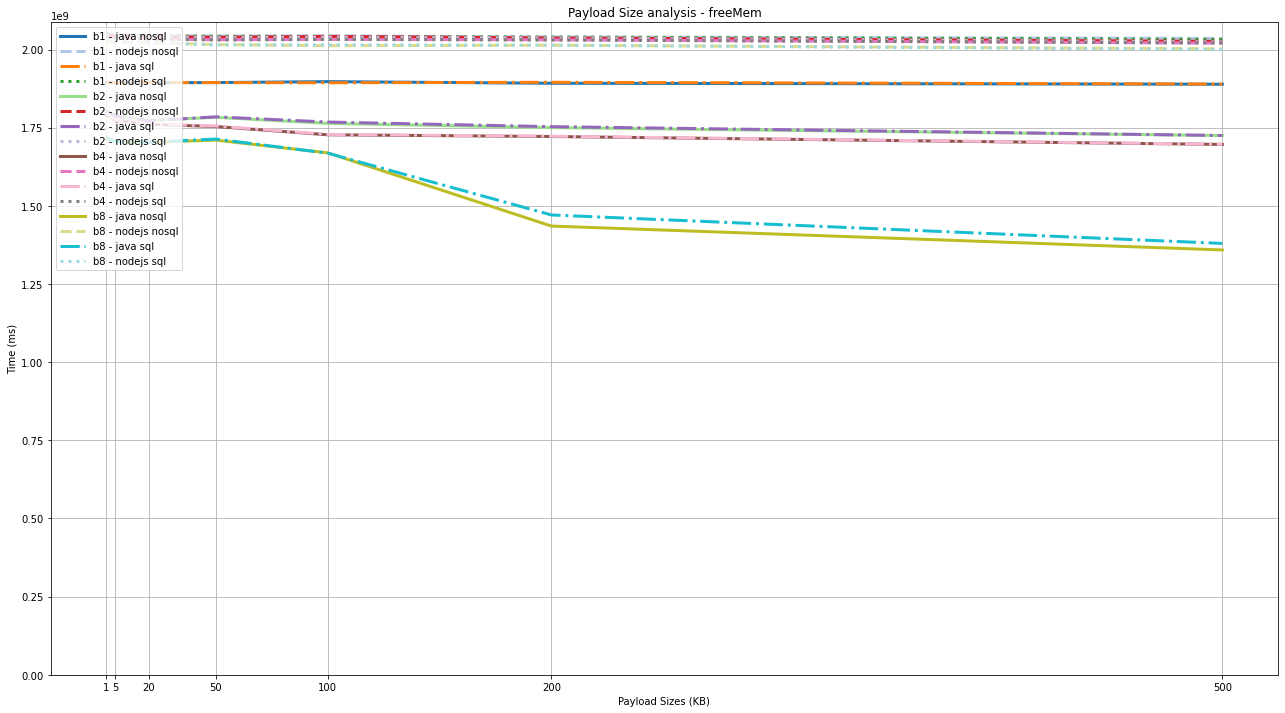

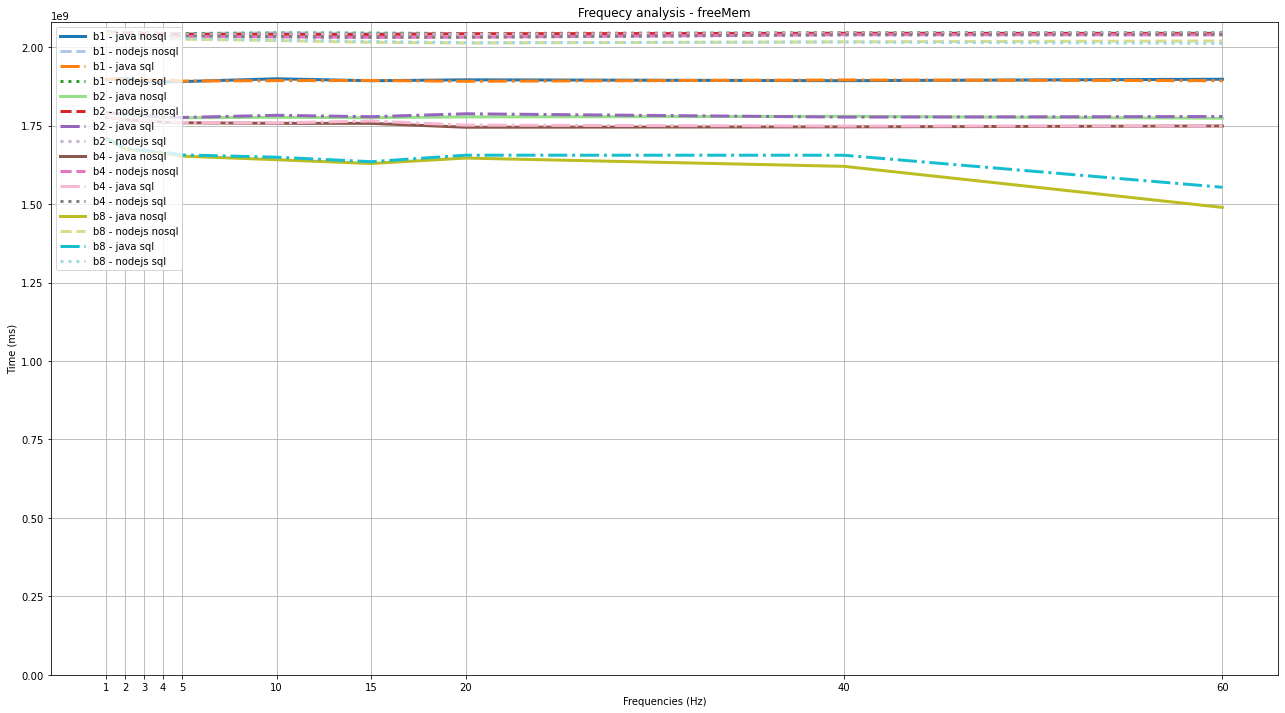

In [48]:
plot_request_sizes('freeMem')
plot_frequencies('freeMem')

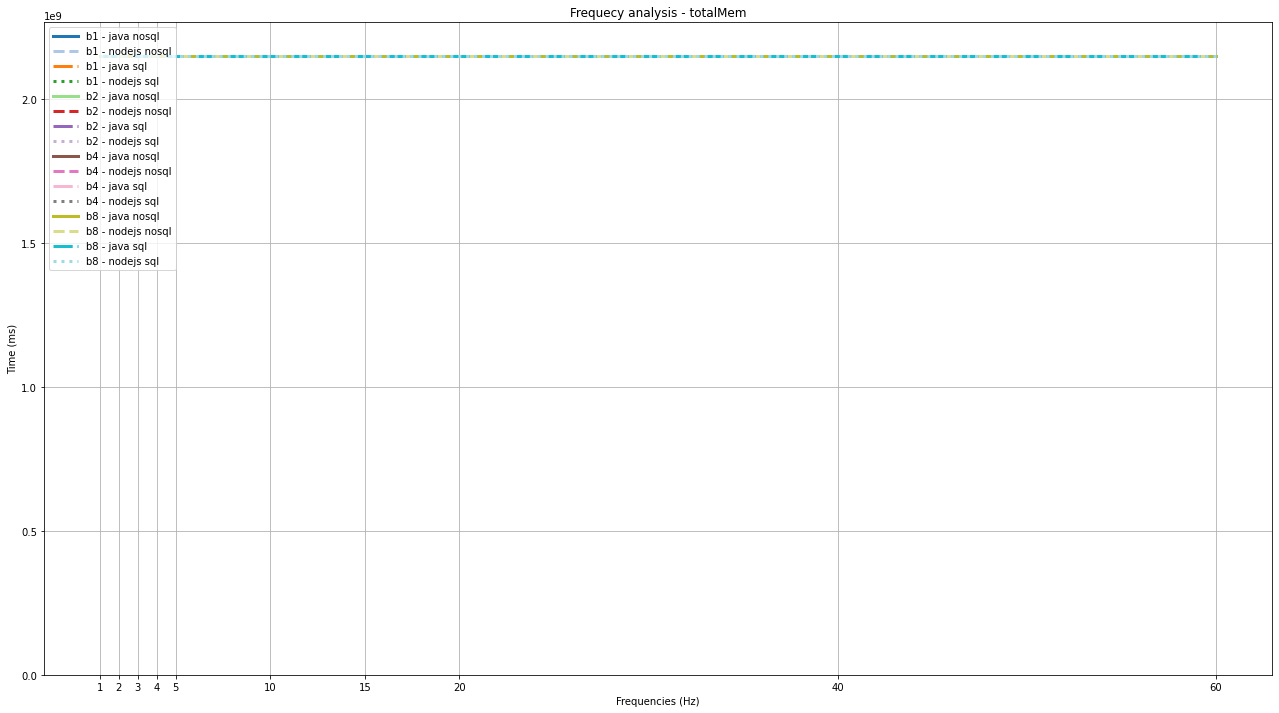

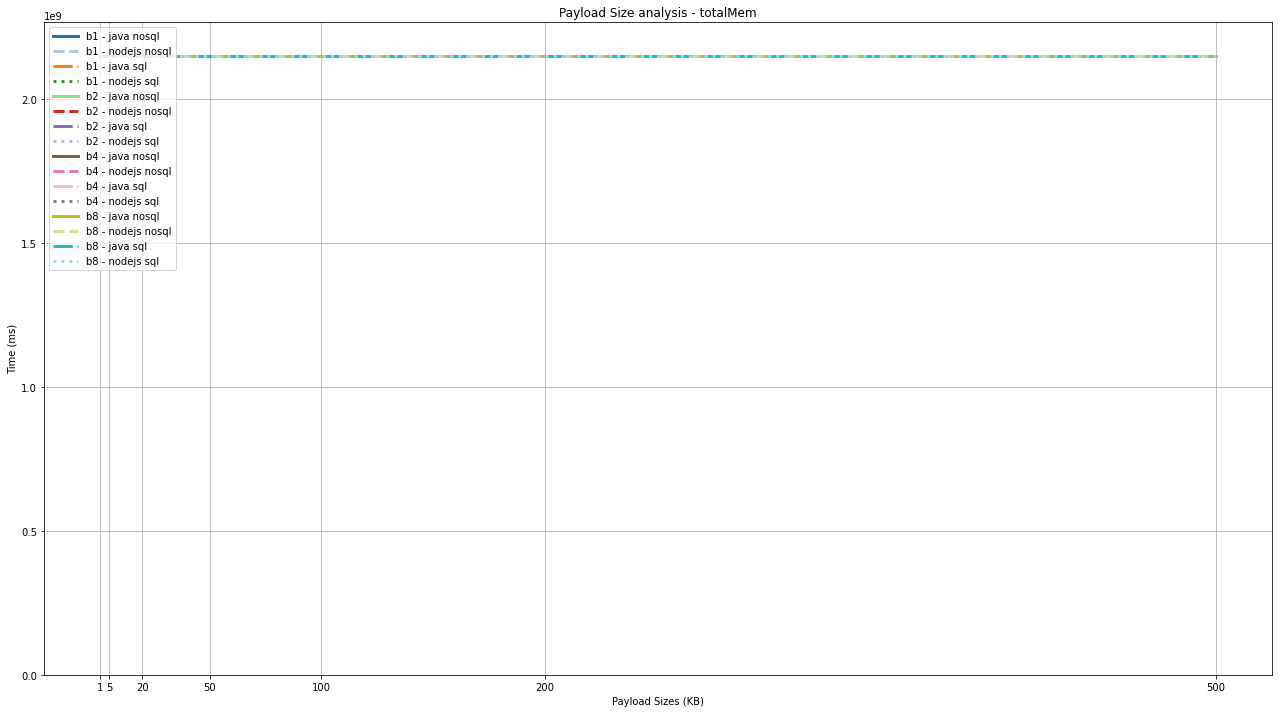

In [49]:
plot_frequencies('totalMem')
plot_request_sizes('totalMem')

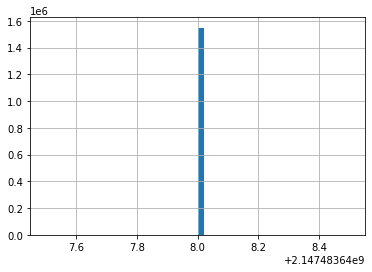

In [11]:
df['totalMem'].hist(bins=50)

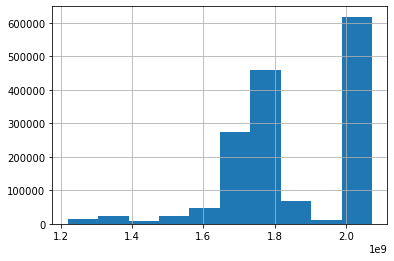

In [12]:
df['freeMem'].hist()

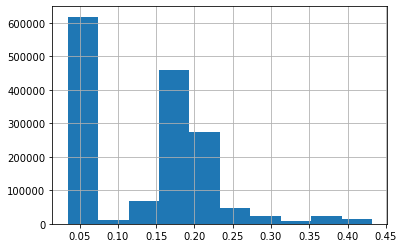

In [13]:
df['memUsage'].hist()

In [70]:
plt.rcParams["figure.figsize"] = (20,8)

In [16]:
df['combination']=df.apply(lambda x:'%s - %s %s' % (x['instanceType'],x['serverType'],x['databaseType']),axis=1)            

In [19]:
df.head()

,id,databaseType,totalMem,timeRead,timeDelete,totalTime,timestamp,serverType,clientTotalTime,requestSize,frequency,instanceType,freeMem,timeWrite,memUsage,combination
0,VWo2CJrUe,sql,2.147484e+09,3.0,81.0,236.0,1.585877e+12,java,425.0,1.0,1.0,b1,1.887261e+09,8.0,0.121176,b1 - java sql
1,Ge9D-u1oz,sql,2.147484e+09,3.0,91.0,299.0,1.585877e+12,java,489.0,1.0,1.0,b1,1.887121e+09,9.0,0.121241,b1 - java sql
2,W789KeB31,sql,2.147484e+09,3.0,7.0,154.0,1.585877e+12,java,292.0,1.0,1.0,b1,1.886994e+09,10.0,0.121300,b1 - java sql
3,YW4UJ3m4N,sql,2.147484e+09,86.0,8.0,255.0,1.585877e+12,java,448.0,1.0,1.0,b1,1.886646e+09,10.0,0.121462,b1 - java sql
4,RRAbhpXkJ,sql,2.147484e+09,4.0,6.0,152.0,1.585877e+12,java,288.0,1.0,1.0,b1,1.886482e+09,9.0,0.121538,b1 - java sql


In [101]:
def plot_stacked_hist(metric, bins=100):
    colors = plt.cm.get_cmap('tab20', 16)(np.linspace(0, 1, 16))
    combinations = []
    labels = []
    for combo in df['combination'].unique():
        combo_df = df.loc[df['combination'] == combo]
        combinations.append(combo_df[metric])
        labels.append(combo)

    plt.hist(combinations, bins=bins, stacked=True, label=labels, color=colors)
    plt.legend()
    plt.legend(prop={'size': 10})
    plt.title('Stacked Histogram - ' + metric)
    plt.xlabel(metric)
    plt.ylabel('number of occurances')
    plt.savefig('graphs/histogram/stacked-histogram-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

def plot_hist(metric, bins=10):
    colors = plt.cm.get_cmap('tab20', 16)(np.linspace(0, 1, 16))
    combinations = []
    labels = []
    for combo in df['combination'].unique():
        combo_df = df.loc[df['combination'] == combo]
        combinations.append(combo_df[metric])
        labels.append(combo)

    plt.hist(combinations, bins=bins, label=labels, color=colors)
    plt.legend()
    plt.legend(prop={'size': 10})
    plt.title('Histogram - ' + metric)
    plt.xlabel(metric)
    plt.ylabel('number of occurances')
    plt.savefig('graphs/histogram/histogram-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

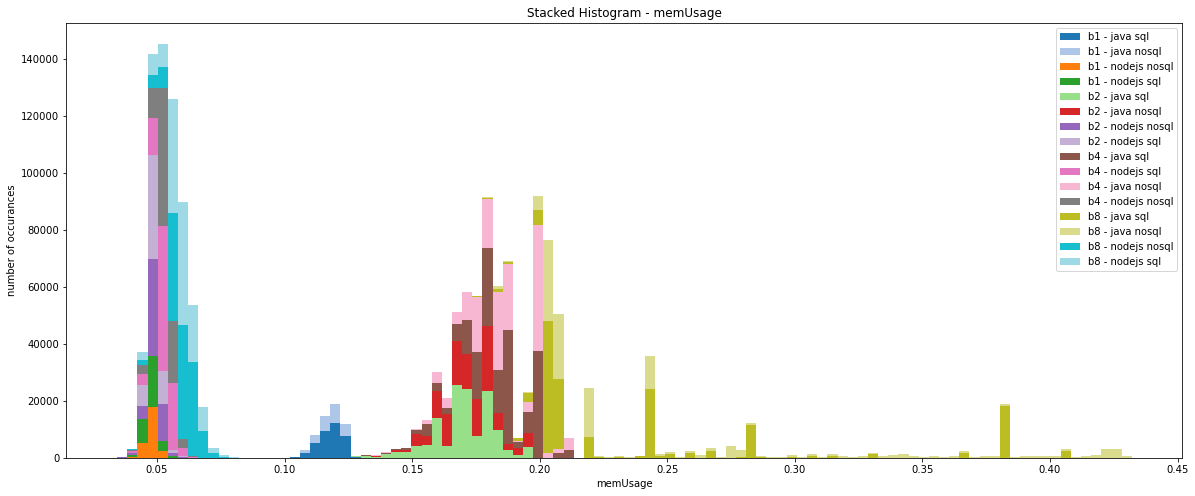

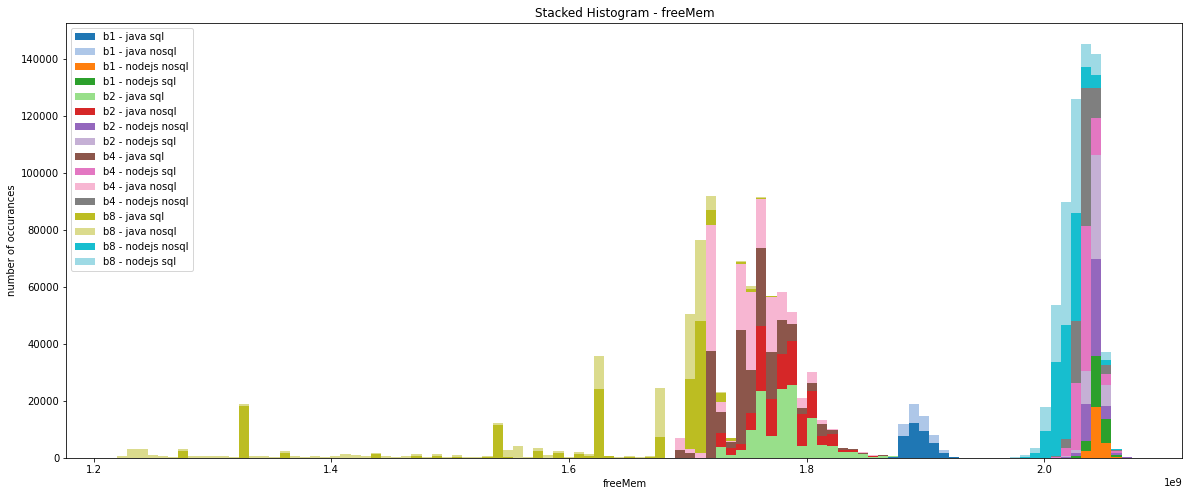

In [97]:
# Stacked Histogram
# plot_stacked_hist('totalMem')
plot_stacked_hist('memUsage')
plot_stacked_hist('freeMem')

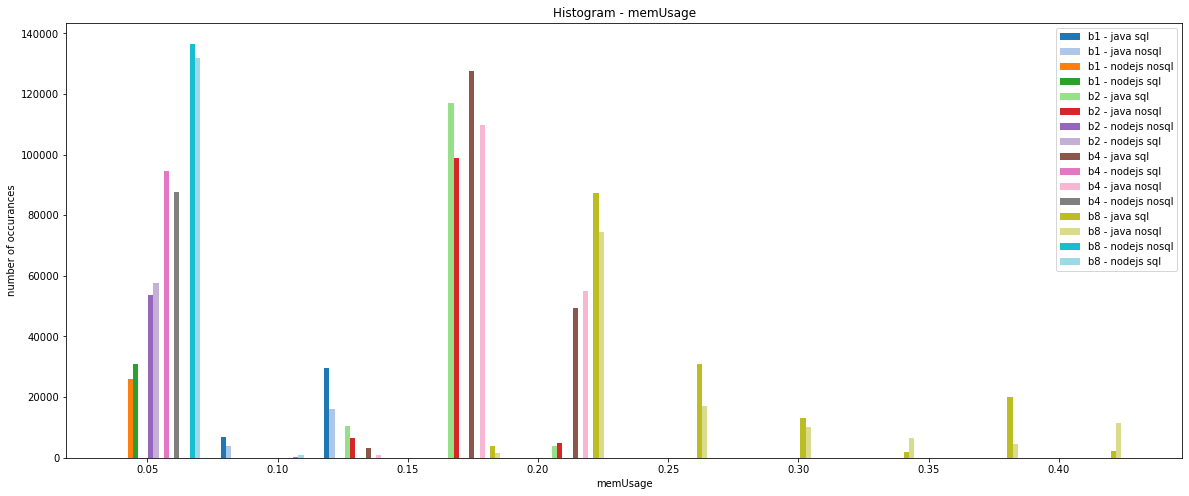

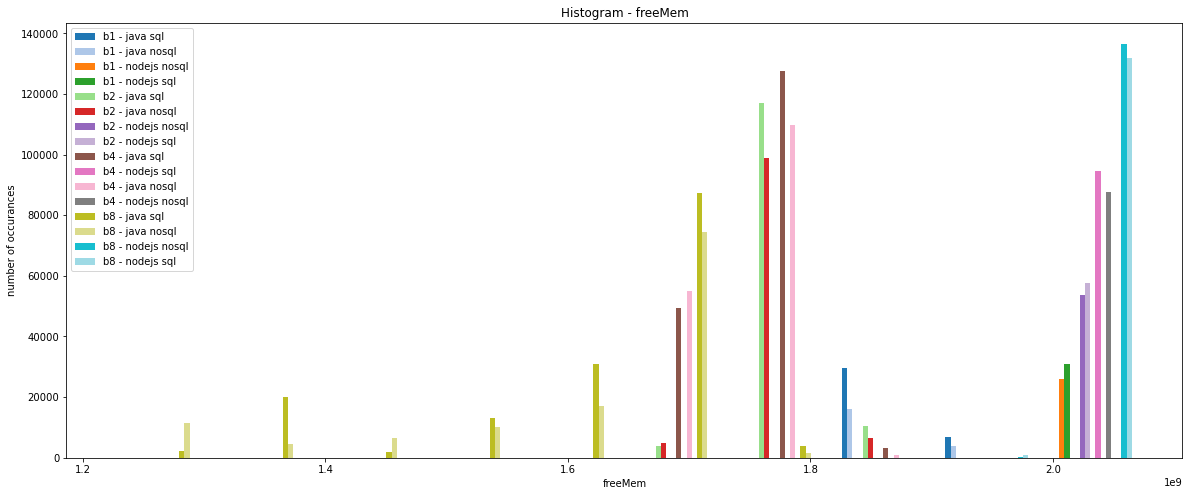

In [98]:
# plot_hist('totalMem')
plot_hist('memUsage')
plot_hist('freeMem')

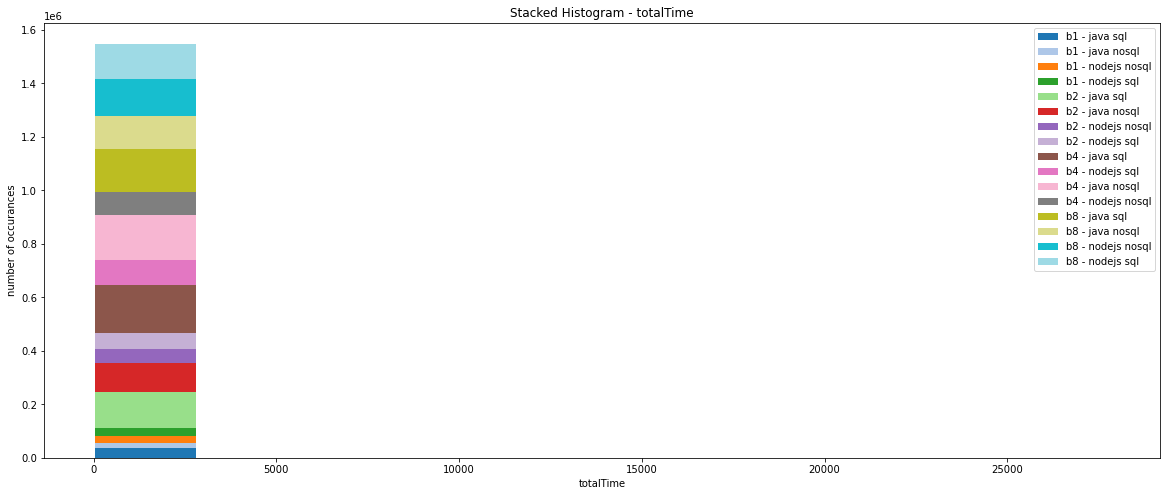

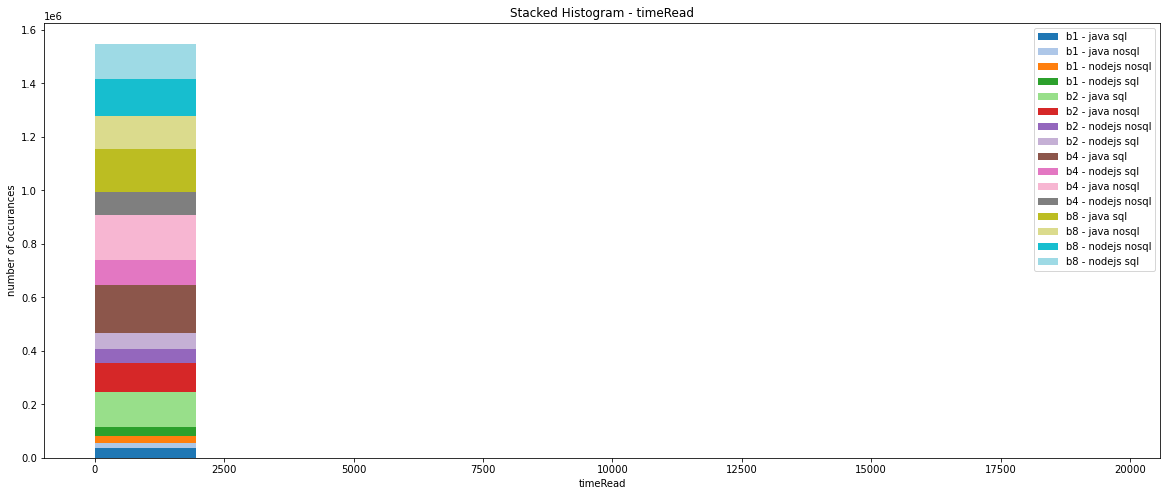

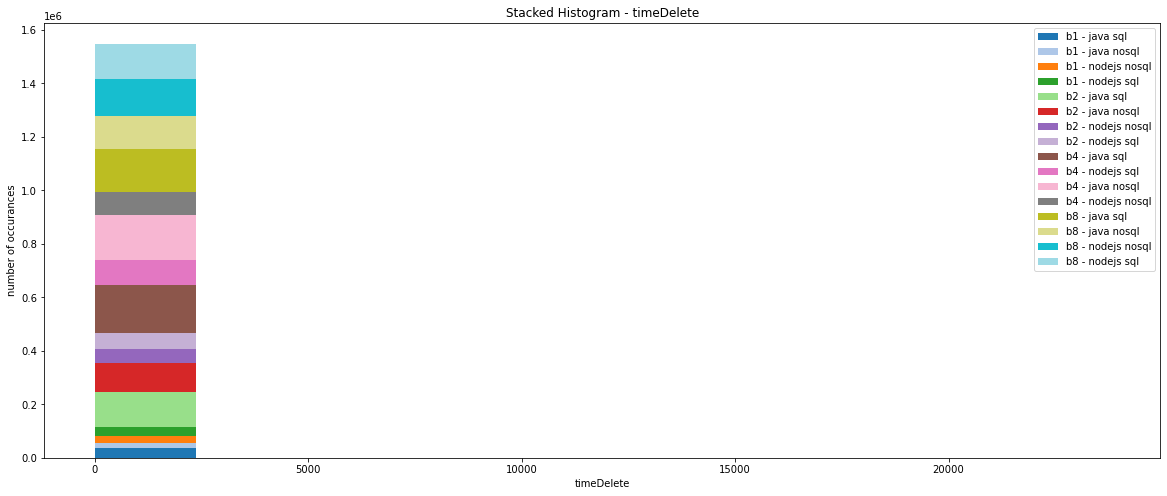

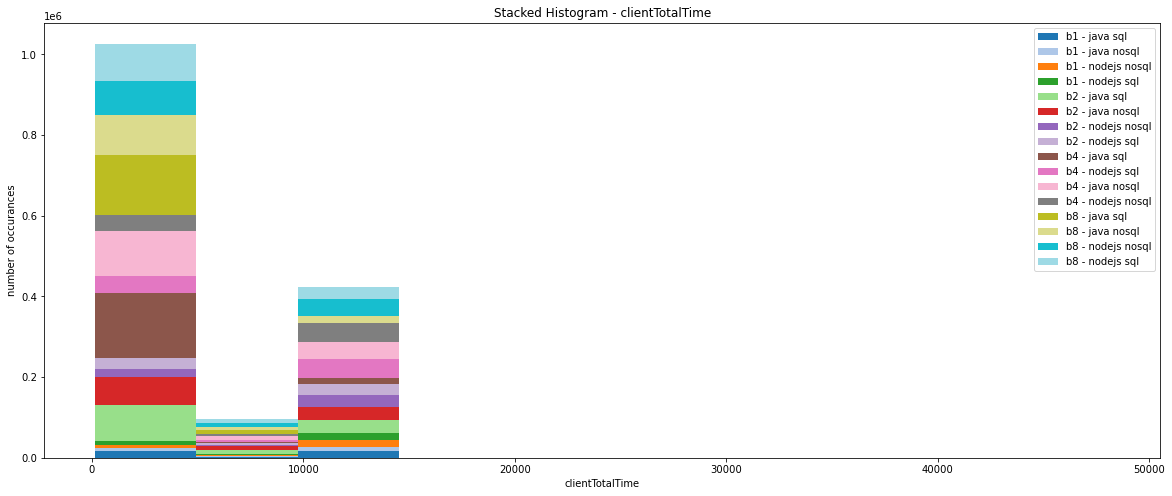

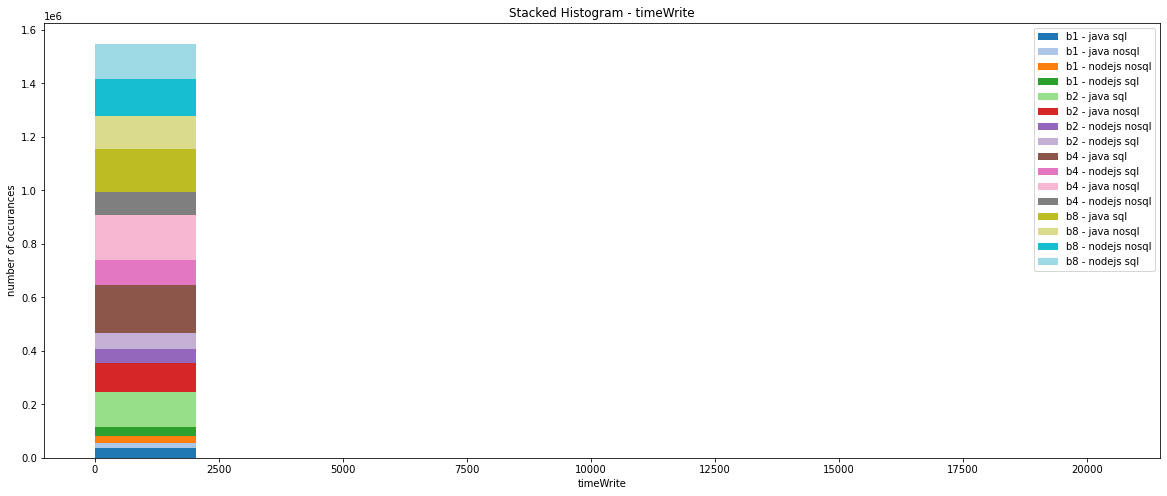

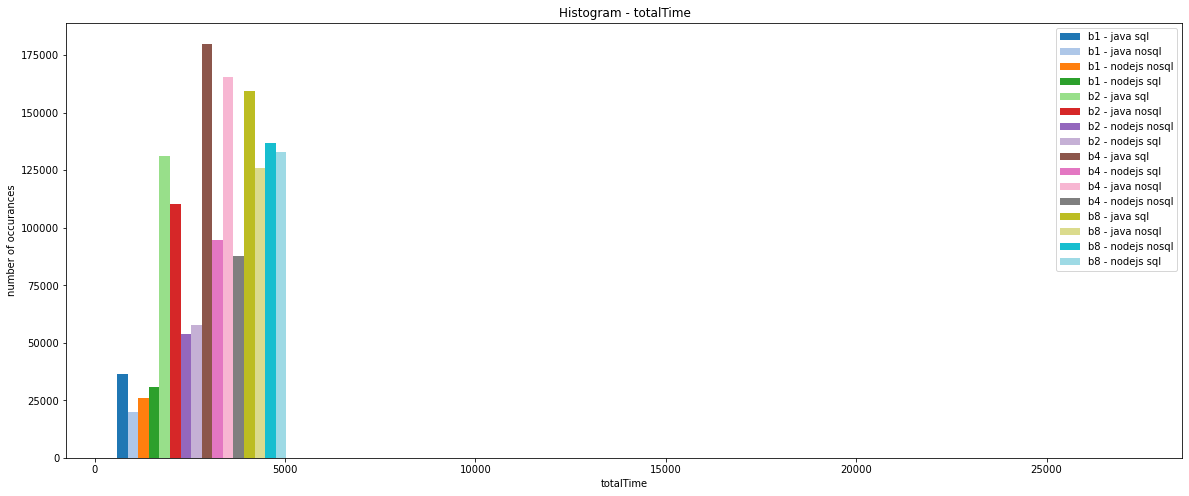

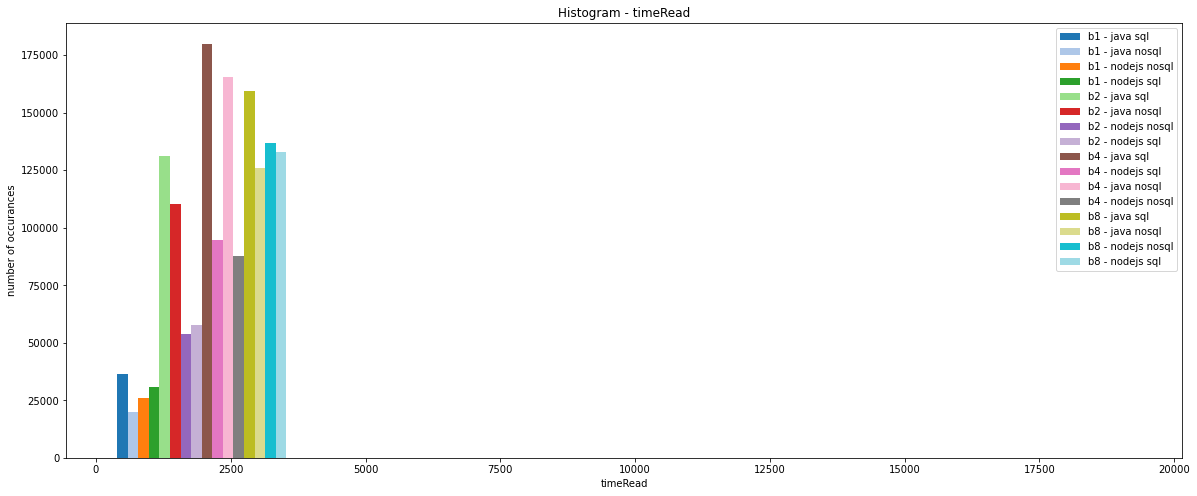

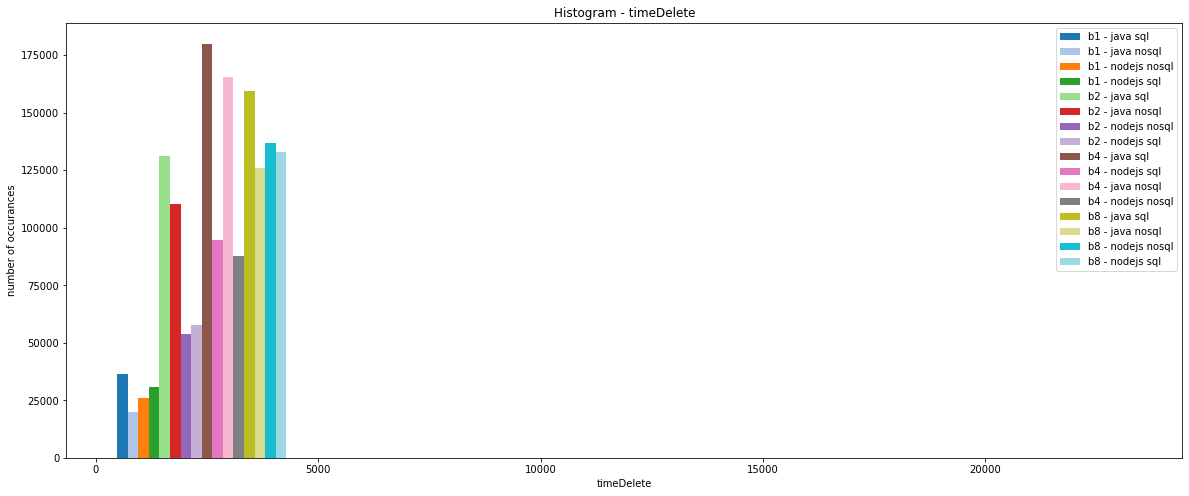

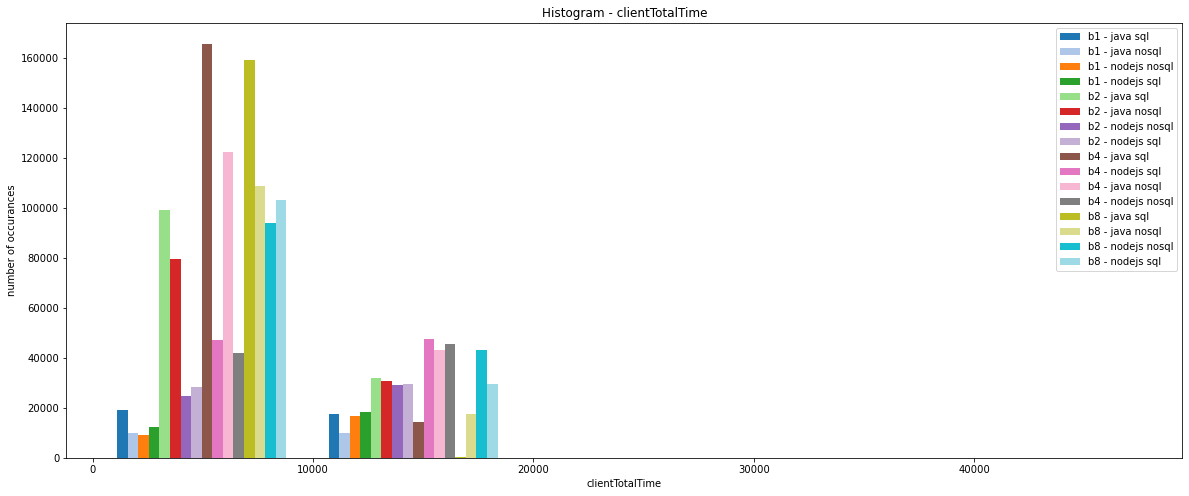

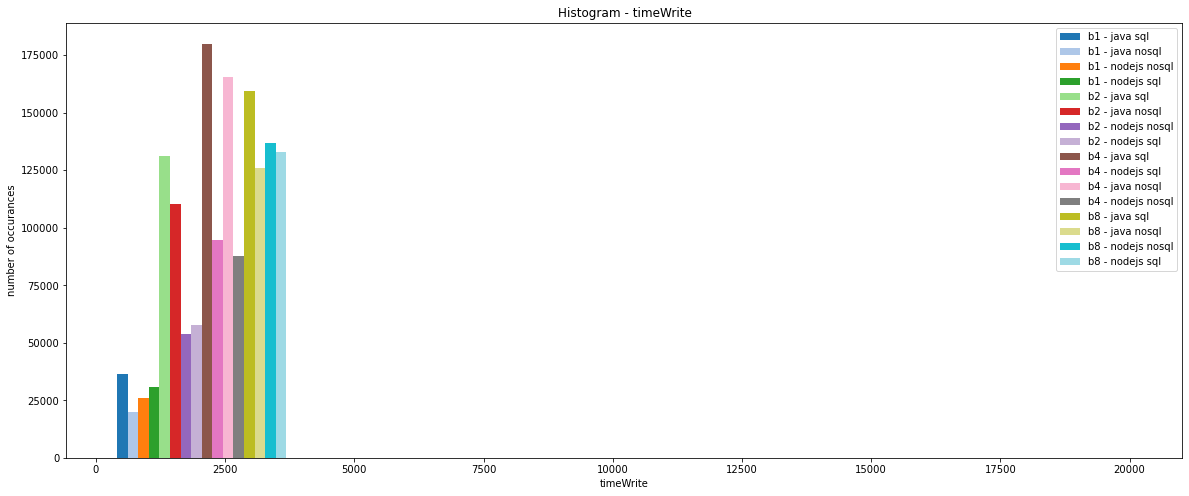

In [108]:
plot_stacked_hist('totalTime', 10)
plot_stacked_hist('timeRead', 10)
plot_stacked_hist('timeDelete', 10)
plot_stacked_hist('clientTotalTime', 10)
plot_stacked_hist('timeWrite', 10)

plot_hist('totalTime', 5)
plot_hist('timeRead', 5)
plot_hist('timeDelete', 5)
plot_hist('clientTotalTime', 5)
plot_hist('timeWrite', 5)

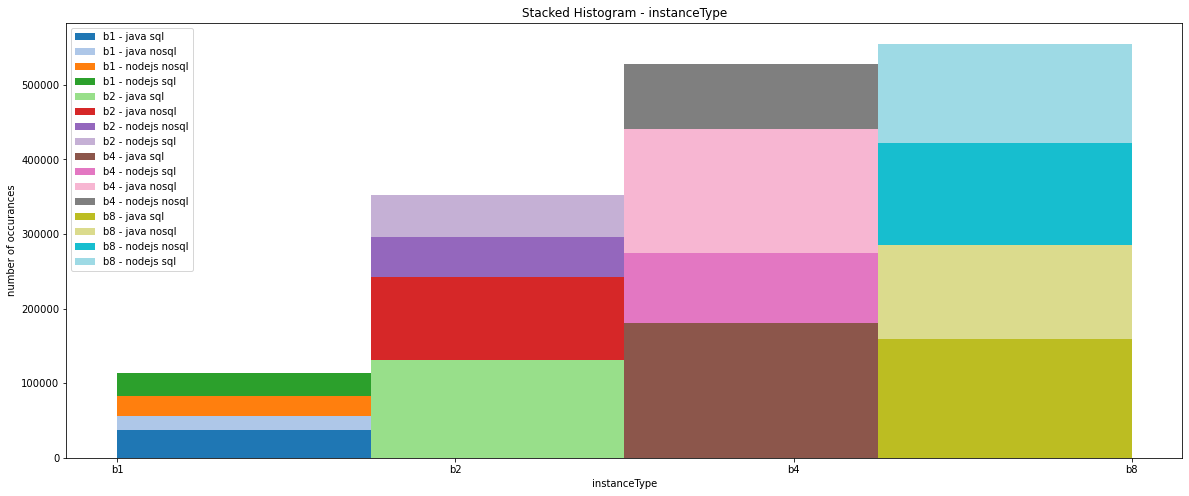

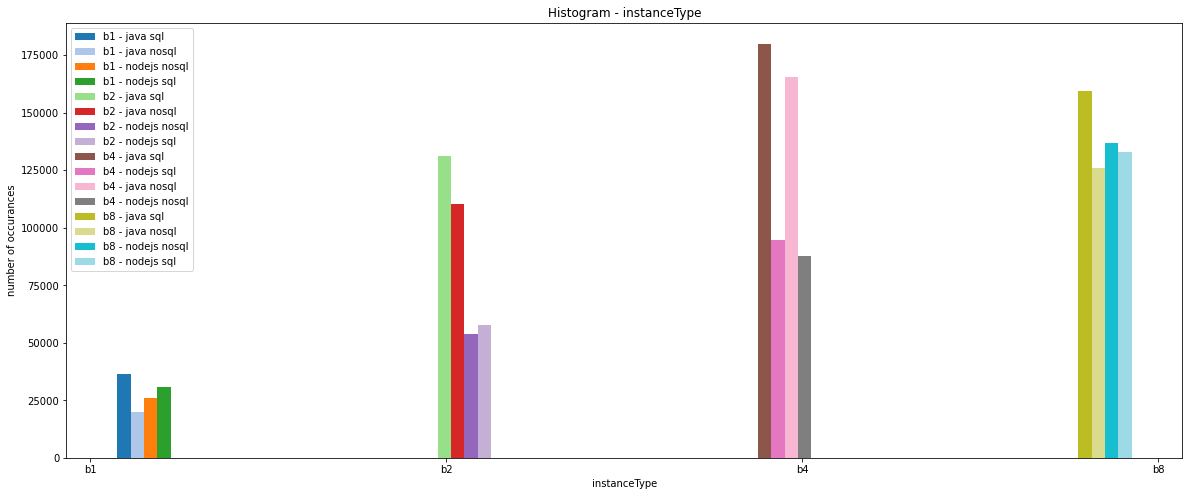

In [103]:
plot_stacked_hist('instanceType', 4)
plot_hist('instanceType', 4)

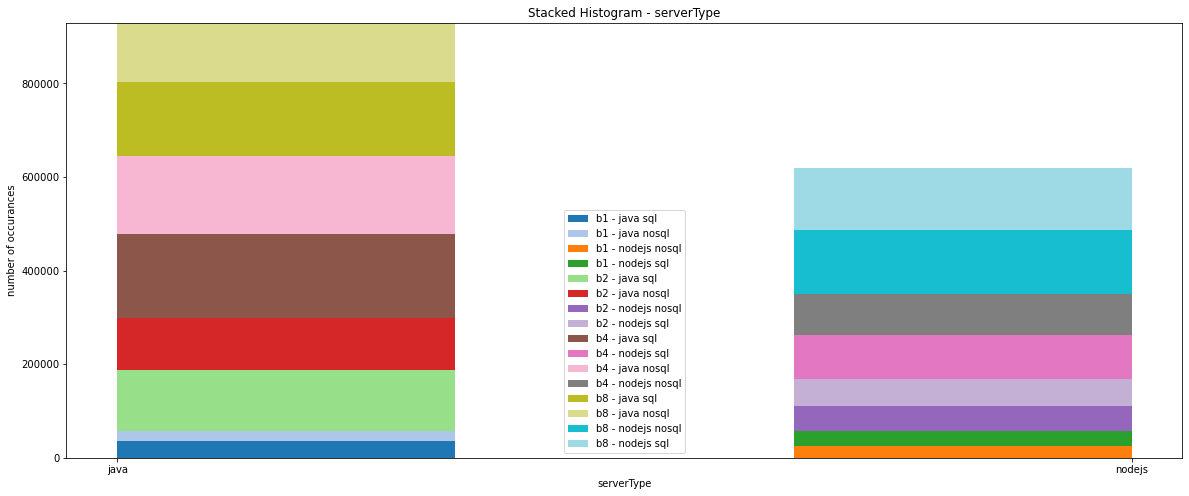

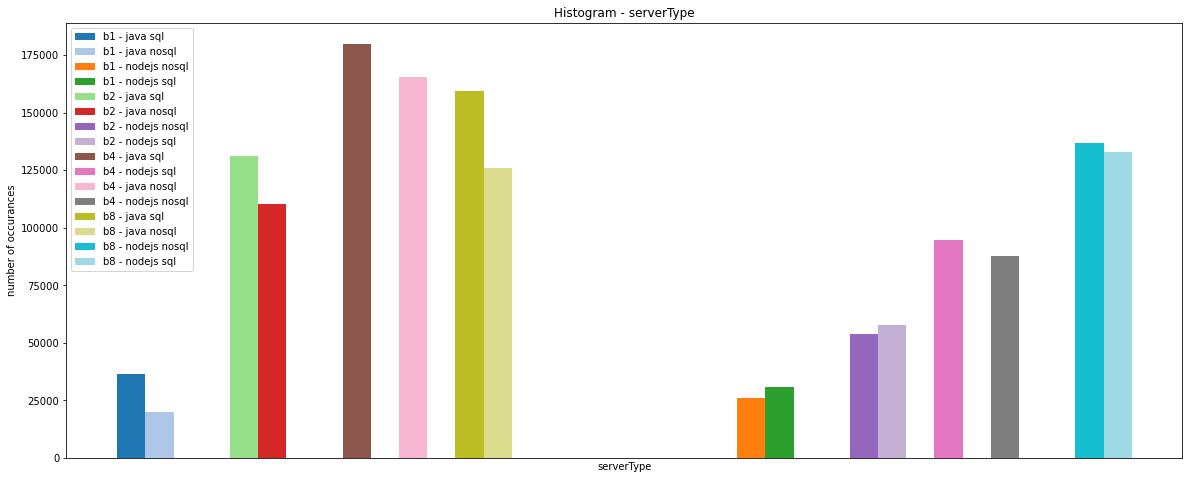

In [106]:
plot_stacked_hist('serverType', 3)
plot_hist('serverType', 2)

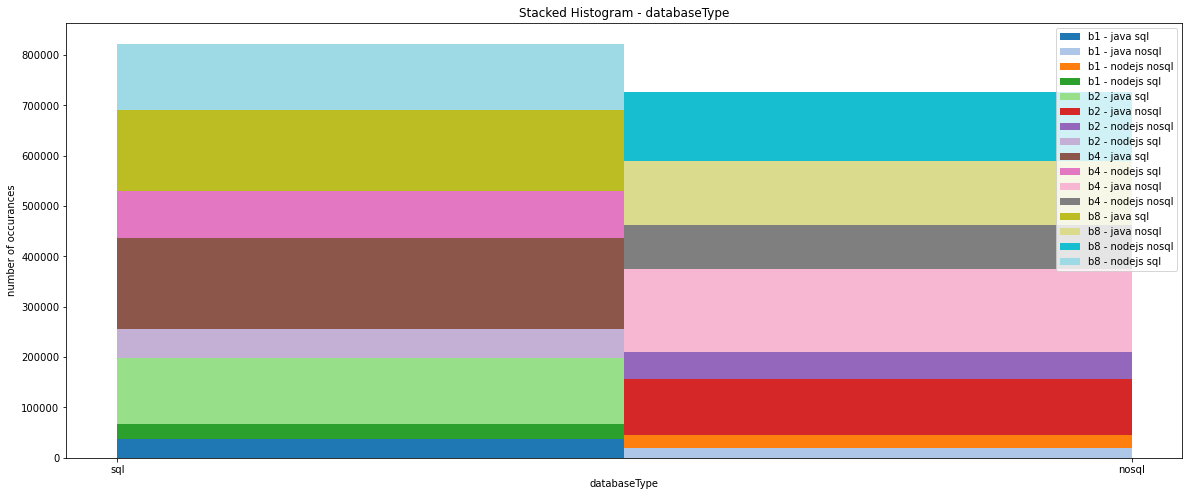

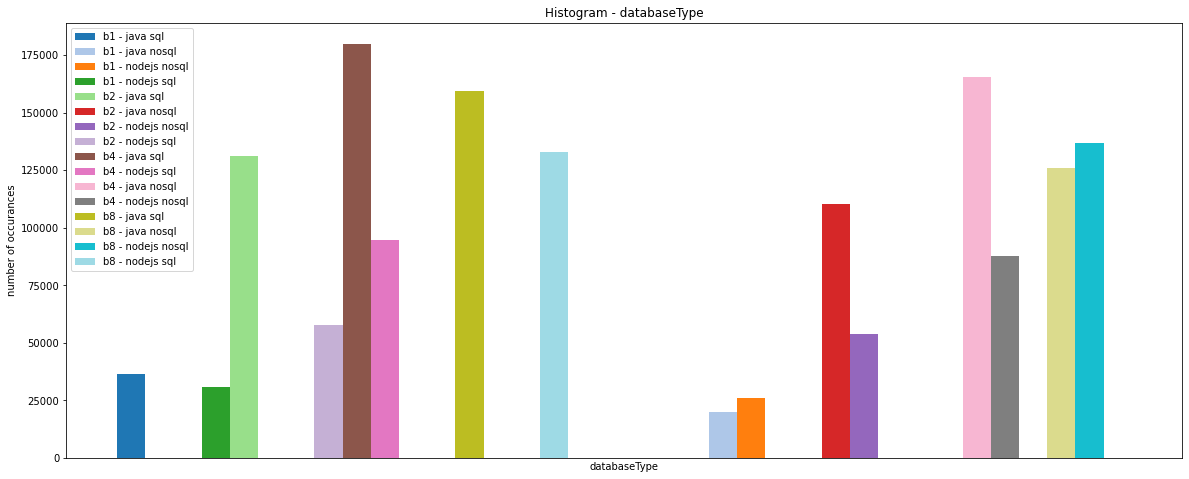

In [107]:
plot_stacked_hist('databaseType', 2)
plot_hist('databaseType', 2)

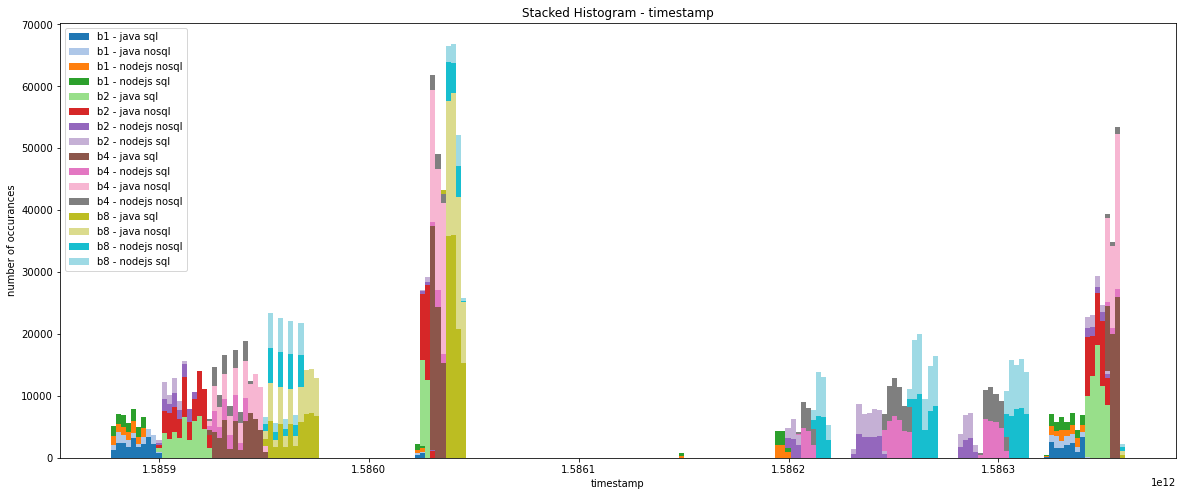

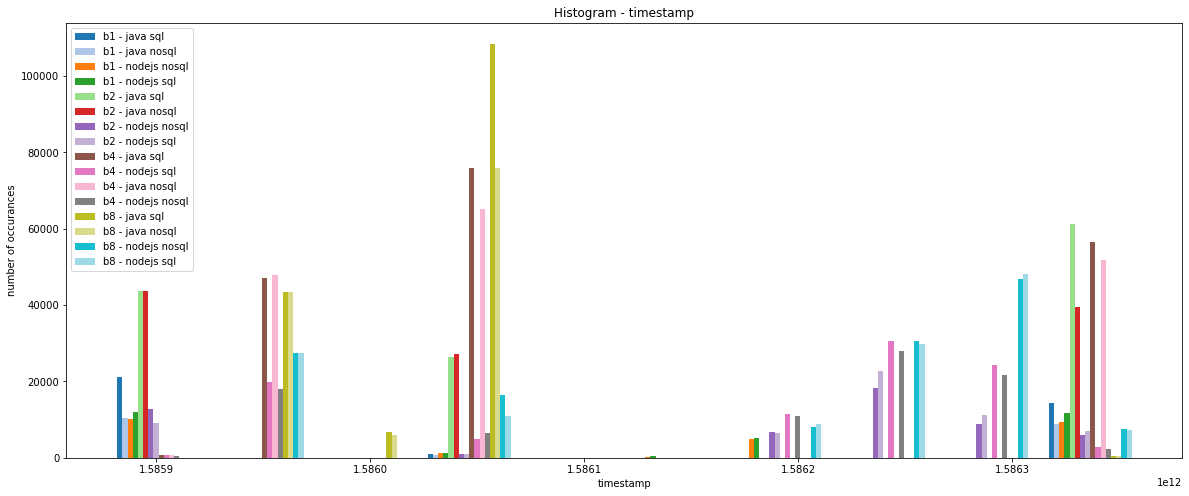

In [110]:
plot_stacked_hist('timestamp', 200)
plot_hist('timestamp')